# THIRD PHASE: TIME SERIES ANALYSIS

In [ ]:
# first: check for outliers (maybe boxplot?)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yellowbrick
import seaborn as sb

In [7]:
fPath = 'Walmart_Sales.csv'
df = pd.read_csv(fPath)

# cambiare da fahreneit a celsius

print(df['Temperature'])
df['Temperature'] = round(((df['Temperature'] - 32) * 5/9), 2)

0       42.31
1       38.51
2       39.93
3       46.63
4       46.50
        ...  
6430    64.88
6431    64.89
6432    54.47
6433    56.47
6434    58.85
Name: Temperature, Length: 6435, dtype: float64


In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')  # convert to pandas datetime format

# manage "Date" column

df['Year'] = df['Date'].dt.year

# Extract month from the 'date' column
df['Month'] = df['Date'].dt.month

# Extract month name from the 'date' column
df['Month_Name'] = df['Date'].dt.month_name()

# Extract day from the 'date' column
df['Day'] = df['Date'].dt.day

C:\Users\matti\AppData\Local\Temp\ipykernel_18800\93438370.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])  # convert to pandas datetime format


In [10]:
df = df.drop(columns=['Date', 'Month_Name'])

In [11]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,1643690.90,0,5.73,2.572,211.096358,8.106,2010,5,2
1,1,1641957.44,1,3.62,2.548,211.242170,8.106,2010,12,2
2,1,1611968.17,0,4.41,2.514,211.289143,8.106,2010,2,19
3,1,1409727.59,0,8.13,2.561,211.319643,8.106,2010,2,26
4,1,1554806.68,0,8.06,2.625,211.350143,8.106,2010,5,3


In [7]:
# outliers --> su weekly_sales
# e cerco consistenza su colonna Date

df['Weekly_Sales'].describe()

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

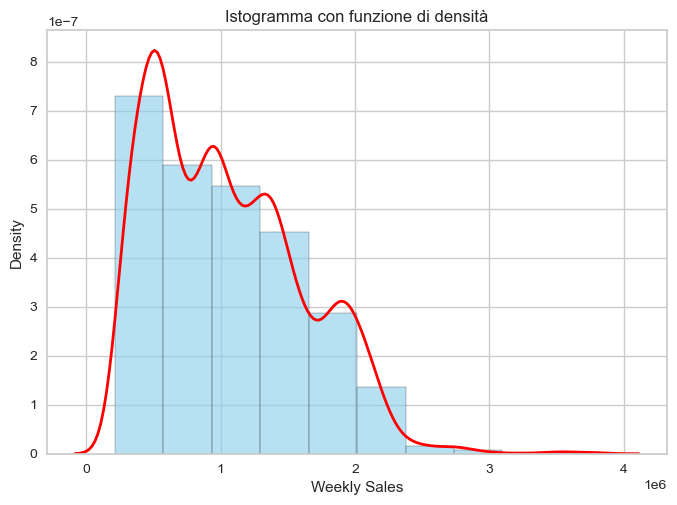

In [17]:
plt.hist(df['Weekly_Sales'], bins=10, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Aggiungi la stima della densità
sb.kdeplot(df['Weekly_Sales'], color='red', linewidth=2)

# Titoli e assi
plt.title("Istogramma con funzione di densità")
plt.xlabel("Weekly Sales")
plt.ylabel("Density")
plt.show()


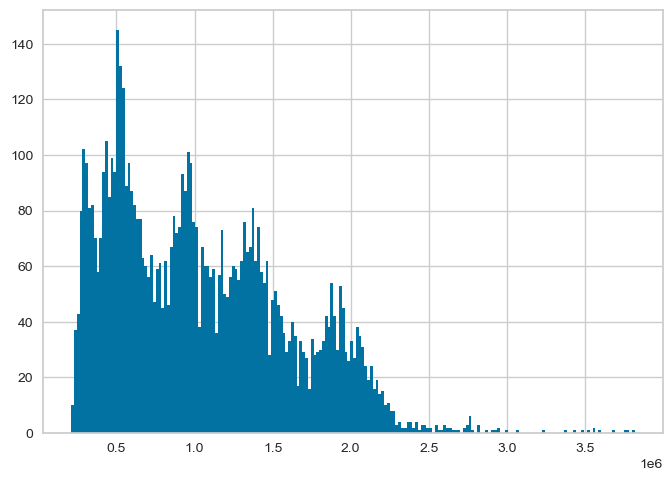

In [21]:
plt.hist(df['Weekly_Sales'], bins=200)
plt.show()

In [22]:
df['Weekly_Sales'].isna().sum()  # check for missing values

0

In [45]:
df['Day'].value_counts().unique()

array([270, 225, 180,  90], dtype=int64)

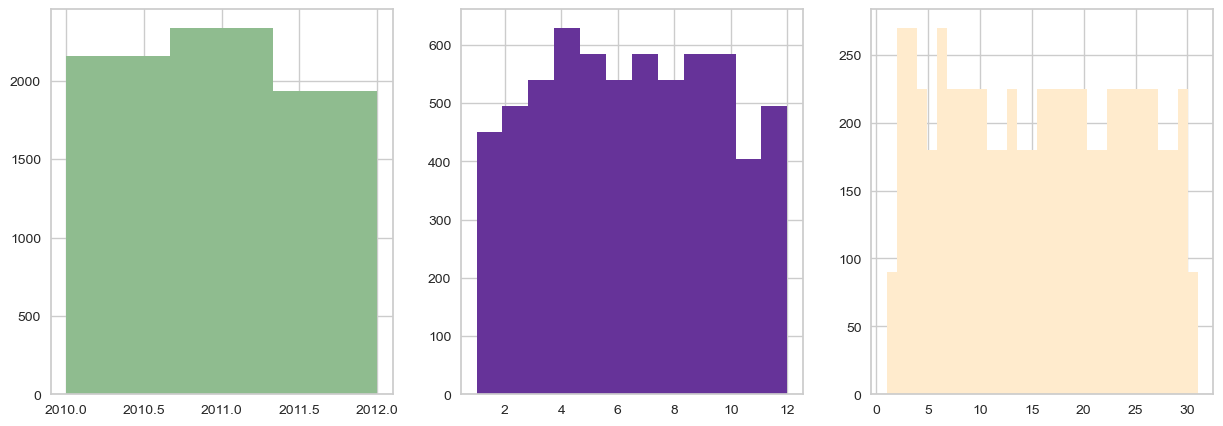

In [42]:
# check for consistency
# check for eventual missing data values

fig,axes = plt.subplots(1,3)
cols = ['Year','Month','Day']
colors = ['darkseagreen','rebeccapurple','blanchedalmond']

for col,color,ax in zip(cols,colors,axes):
    ax.hist(df[col], bins=len(df[col].unique()), color=color)
fig.set_figheight(5)
fig.set_figwidth(15)
plt.show()

In [30]:
df['Month'].value_counts()

Month
4     630
5     585
9     585
7     585
10    585
3     540
6     540
8     540
12    495
2     495
1     450
11    405
Name: count, dtype: int64

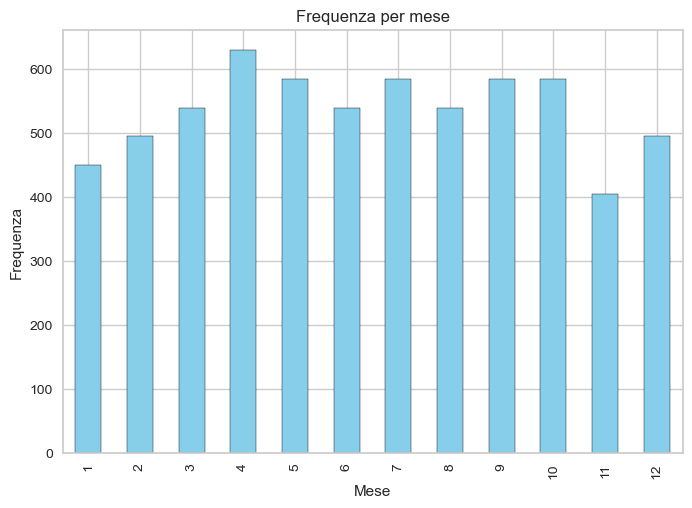

In [ ]:
df['Month'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Frequenza per mese")
plt.xlabel("Mese")
plt.ylabel("Frequenza")
plt.show()

(array([450., 495., 540., 630., 585., 540., 585., 540., 585., 585., 405.,
        495.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <BarContainer object of 12 artists>)

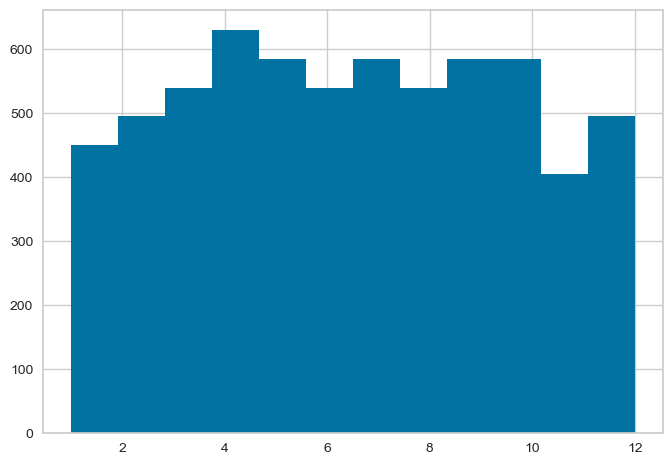

In [40]:
plt.hist(df['Month'], bins=len(df['Month'].unique()))


In [ ]:
# non trovo outliers nei valori di Data

# potrei cercare incongruenze nella sequenza


In [50]:
df.iloc[0,-3:].astype('int32')

Year     2010
Month       5
Day         2
Name: 0, dtype: int32

In [49]:
df.dtypes

Store             int64
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Year              int32
Month             int32
Day               int32
dtype: object

In [15]:
# analisi dati mancanti nella sequenza

fPath = 'Walmart_Sales.csv'
df = pd.read_csv(fPath)

df['Date'] = pd.to_datetime(df['Date'], format='mixed')  # convert to pandas datetime format

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

ValueError: time data '05-02-2010' does not match format 'mixed' (match)

In [52]:
dateDiff = df['Date'].diff().dt.days

In [63]:
dateDiff  # some probs!!! let's try to inspect

0         NaN
1       214.0
2      -286.0
3         7.0
4        66.0
        ...  
6430      7.0
6431   -141.0
6432    214.0
6433    -52.0
6434      7.0
Name: Date, Length: 6435, dtype: float64

In [126]:
# focus on one single store

dateStore = df[df['Store']==1]['Date']  # storeId is int64

In [98]:
dateStore = dateStore.sort_values()
dateStore.head()

34   2010-01-10
8    2010-02-04
21   2010-02-07
2    2010-02-19
3    2010-02-26
Name: Date, dtype: datetime64[ns]

In [83]:
dateDiff = dateStore.diff().dt.days
dateDiff

34      NaN
8      25.0
21      3.0
2      12.0
3       7.0
       ... 
131     6.0
141    11.0
142     7.0
118    10.0
140    35.0
Name: Date, Length: 143, dtype: float64

In [17]:
# Assicurati che 'Date' sia in formato datetime
dateStore = df[df['Store'] == 1][['Date', 'Weekly_Sales']]
dateStore['Date'] = pd.to_datetime(dateStore['Date'])

# Ordina per data
dateStore = dateStore.sort_values('Date')

# Crea l'intervallo regolare
regular_dates = pd.date_range(start=dateStore['Date'].min(), end=dateStore['Date'].max(), freq='7D')

# Crea una nuova serie con le date regolari come indice
dateStore_regular = pd.Series(index=regular_dates, dtype='float64')

C:\Users\matti\AppData\Local\Temp\ipykernel_18800\3018515300.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dateStore['Date'] = pd.to_datetime(dateStore['Date'])


In [9]:
print(dateStore)
print(dateStore_regular)

          Date  Weekly_Sales
34  2010-01-10    1453329.50
8   2010-02-04    1594968.28
21  2010-02-07    1492418.14
2   2010-02-19    1611968.17
3   2010-02-26    1409727.59
..         ...           ...
131 2012-10-08    1592409.97
141 2012-10-19    1508068.77
142 2012-10-26    1493659.74
118 2012-11-05    1611096.05
140 2012-12-10    1573072.81

[143 rows x 2 columns]
2010-01-10   NaN
2010-01-17   NaN
2010-01-24   NaN
2010-01-31   NaN
2010-02-07   NaN
              ..
2012-11-11   NaN
2012-11-18   NaN
2012-11-25   NaN
2012-12-02   NaN
2012-12-09   NaN
Freq: 7D, Length: 153, dtype: float64


In [18]:
# Allinea i valori esistenti usando 'Date' come indice
dateStore.set_index('Date', inplace=True)
dateStore

,Weekly_Sales
Date,
2010-01-10,1453329.50
2010-02-04,1594968.28
2010-02-07,1492418.14
2010-02-19,1611968.17
2010-02-26,1409727.59
...,...
2012-10-08,1592409.97
2012-10-19,1508068.77
2012-10-26,1493659.74


In [19]:
dateStore_regular.update(dateStore['Weekly_Sales'])

# Mostra il risultato
print(dateStore_regular)

2010-01-10    1453329.50
2010-01-17           NaN
2010-01-24           NaN
2010-01-31           NaN
2010-02-07    1492418.14
                 ...    
2012-11-11           NaN
2012-11-18           NaN
2012-11-25           NaN
2012-12-02           NaN
2012-12-09           NaN
Freq: 7D, Length: 153, dtype: float64


In [12]:
print(len(dateStore_regular))
print(dateStore_regular.isna().sum())

153
144


In [20]:
dateStore_regular = dateStore_regular.interpolate('linear')

In [21]:
dateStore1 = df[df['Store'] == 1][['Date', 'Weekly_Sales']]
print(dateStore1)

           Date  Weekly_Sales
0    05-02-2010    1643690.90
1    12-02-2010    1641957.44
2    19-02-2010    1611968.17
3    26-02-2010    1409727.59
4    05-03-2010    1554806.68
..          ...           ...
138  28-09-2012    1437059.26
139  05-10-2012    1670785.97
140  12-10-2012    1573072.81
141  19-10-2012    1508068.77
142  26-10-2012    1493659.74

[143 rows x 2 columns]


In [ ]:
n = len(df['Store'].unique())

for i in range(1,n+1):
    dateStore1 = df[df['Store'] == i][['Date', 'Weekly_Sales']]
    dateStore1['Date'] = pd.to_datetime(dateStore1['Date'])
    
    # Ordina per data
    dateStore1.set_index('Date', inplace=True)
    dateStore1 = dateStore1.sort_values('Date')

    dateStore1.plot()

In [147]:
dateStore_regular['2011-07-24':]

2011-07-24    1.582920e+06
2011-07-31    1.558885e+06
2011-08-07    1.534850e+06
2011-08-14    1.534850e+06
2011-08-21    1.534850e+06
                  ...     
2012-11-11    1.534850e+06
2012-11-18    1.534850e+06
2012-11-25    1.534850e+06
2012-12-02    1.534850e+06
2012-12-09    1.534850e+06
Freq: 7D, Length: 73, dtype: float64

<Axes: xlabel='Date'>

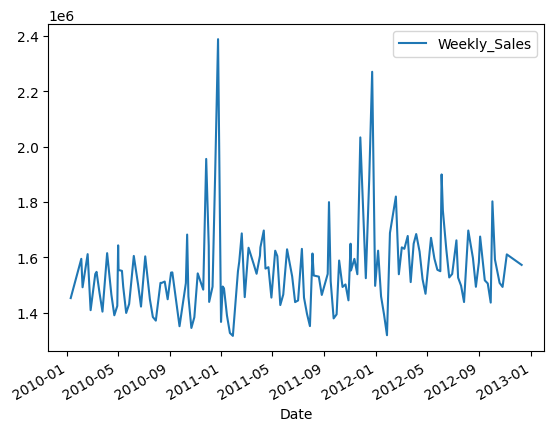

In [22]:
dateStore.plot()

In [159]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

# LET'S TRY DAILY FREQ

In [23]:
dateStore = df[df['Store'] == 1][['Date', 'Weekly_Sales']]
dateStore['Date'] = pd.to_datetime(dateStore['Date'])

dateStore = dateStore.sort_values('Date')

regular_dates = pd.date_range(start=dateStore['Date'].min(), end=dateStore['Date'].max(), freq='1D')

dateStore_regular = pd.Series(index=regular_dates, dtype='float64')

C:\Users\matti\AppData\Local\Temp\ipykernel_18800\3921713769.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dateStore['Date'] = pd.to_datetime(dateStore['Date'])


In [24]:
dateStore.set_index('Date', inplace=True)
dateStore_regular.update(dateStore['Weekly_Sales'])

In [25]:
dateStore_regular = dateStore_regular.interpolate('linear')

In [18]:
dateStore_regular.head()

2010-01-10    1.453330e+06
2010-01-11    1.458995e+06
2010-01-12    1.464661e+06
2010-01-13    1.470326e+06
2010-01-14    1.475992e+06
Freq: D, dtype: float64

In [239]:
dateStore_regular.isna().sum()

0

In [240]:
dateStore_regular.describe()

count    1.066000e+03
mean     1.552326e+06
std      1.312330e+05
min      1.316899e+06
25%      1.476621e+06
50%      1.535910e+06
75%      1.599301e+06
max      2.387950e+06
dtype: float64

<Axes: >

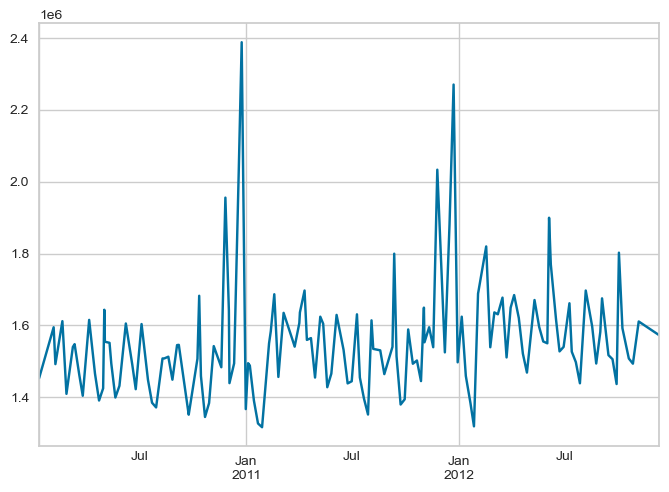

In [243]:
dateStore_regular.plot()

# TIME-SERIES ANALYSIS

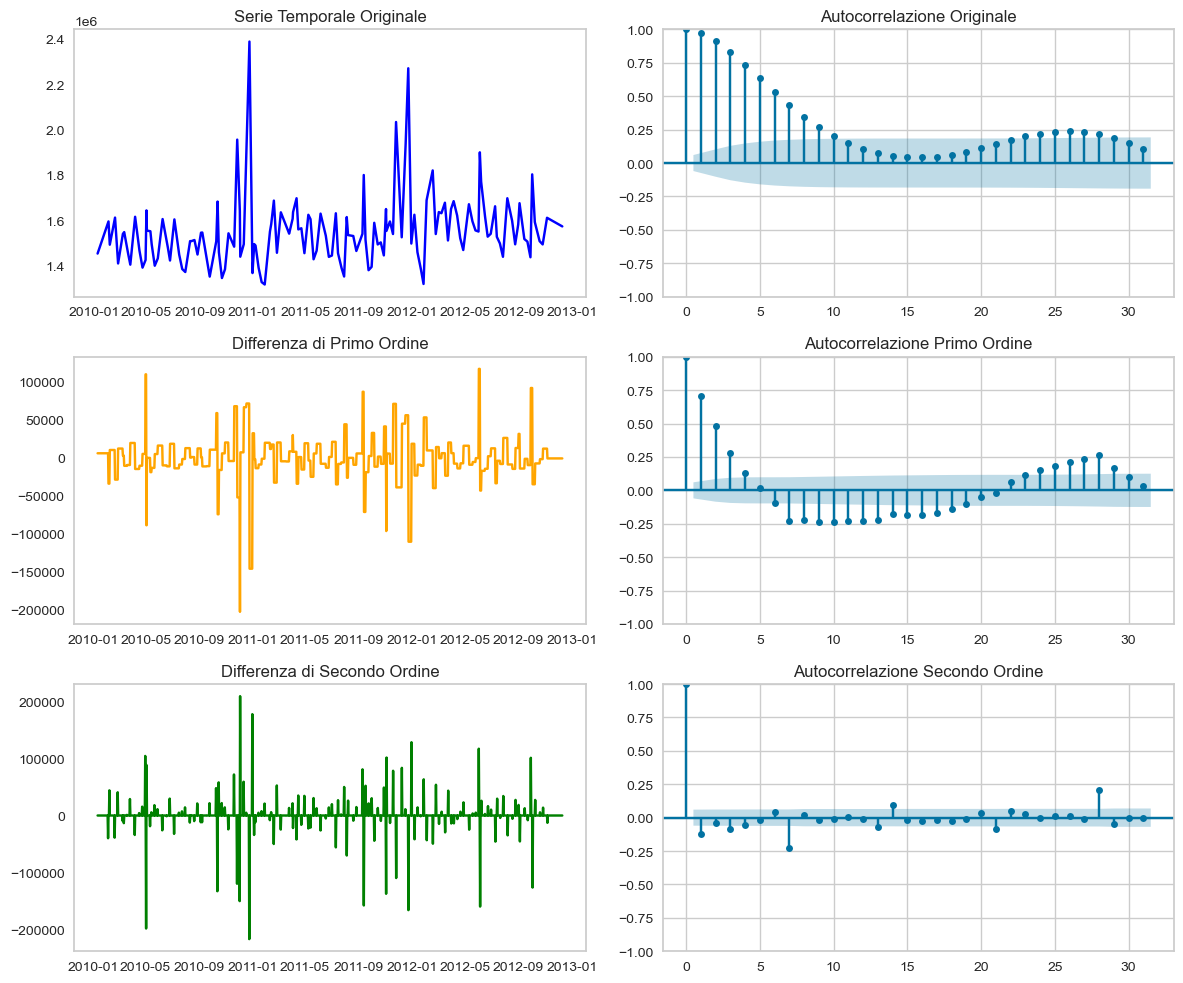

In [247]:
# autocorrelation, with 1st, 2nd and 3rd-order derivations

from statsmodels.graphics.tsaplots import plot_acf
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Plot della serie originale
axes[0, 0].plot(dateStore_regular, color='blue')
axes[0, 0].set_title("Serie Temporale Originale")
axes[0, 0].grid()

# Autocorrelazione della serie originale
plot_acf(dateStore_regular.dropna(), ax=axes[0, 1], title="Autocorrelazione Originale")

# Plot della differenza di primo ordine
axes[1, 0].plot(dateStore_regular.diff(), color='orange')
axes[1, 0].set_title("Differenza di Primo Ordine")
axes[1, 0].grid()

# Autocorrelazione della differenza di primo ordine
plot_acf(dateStore_regular.diff().dropna(), ax=axes[1, 1], title="Autocorrelazione Primo Ordine")

# Plot della differenza di secondo ordine
axes[2, 0].plot(dateStore_regular.diff().diff(), color='green')
axes[2, 0].set_title("Differenza di Secondo Ordine")
axes[2, 0].grid()

# Autocorrelazione della differenza di secondo ordine
plot_acf(dateStore_regular.diff().diff().dropna(), ax=axes[2, 1], title="Autocorrelazione Secondo Ordine")

# Imposta layout
plt.tight_layout()
plt.show()

In [252]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dateStore_regular)

In [255]:
result[1]  # first value is p-value --> A p-value less than 0.05 is typically considered to be statistically significant

# d = 0
# p = 10

1.428397986471716e-10

In [ ]:
resultFirstDer = adfuller(dateStore_regular.diff().dropna())
print(resultFirstDer[1])

# or maybe d = 1 and p = 4

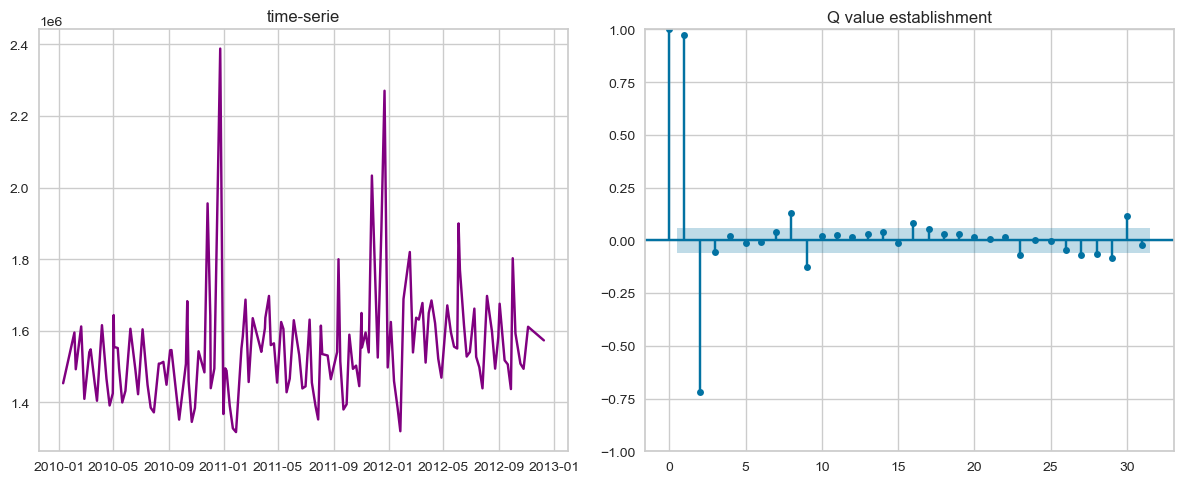

In [262]:
from statsmodels.graphics.tsaplots import plot_pacf

_ , axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(dateStore_regular, color='purple')
axes[0].set_title('time-serie')

plot_pacf(dateStore_regular, ax=axes[1], title='partial autocorrelation')

plt.tight_layout()
plt.title('q value establishment')  # to determine q value for ARIMA & SARIMAX
plt.show()

# IN MY OPINION, Q = 2

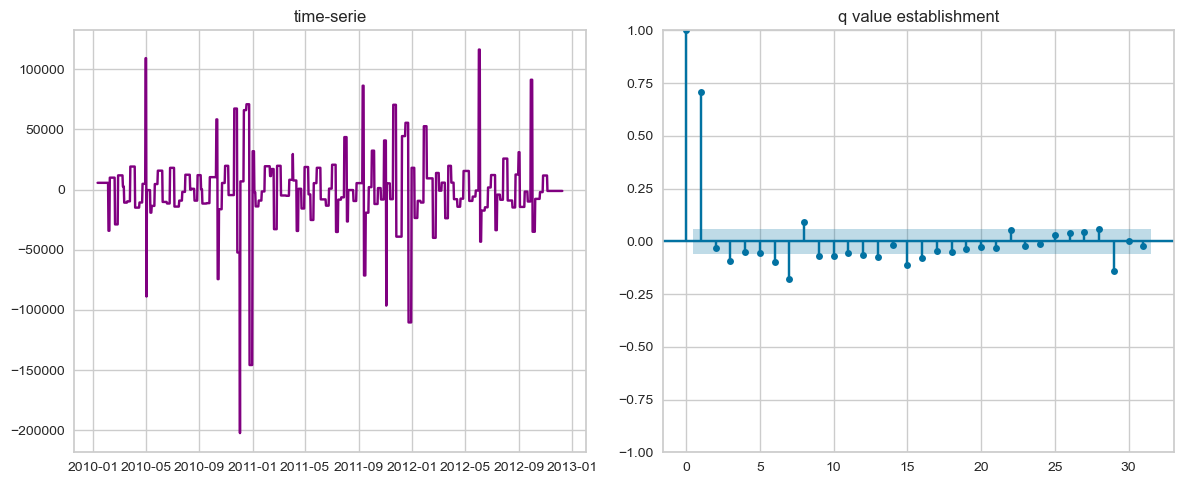

In [265]:
# with the first-order derivation

from statsmodels.graphics.tsaplots import plot_pacf

_ , axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(dateStore_regular.diff().dropna(), color='purple')
axes[0].set_title('time-serie')

plot_pacf(dateStore_regular.diff().dropna(), ax=axes[1], title='partial autocorrelation')

plt.tight_layout()
plt.title('q value establishment')  # to determine q value for ARIMA & SARIMAX
plt.show()

# IN MY OPINION, Q = 1

In [285]:
# ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA

p = 10
d = 0
q = 2

model = ARIMA(dateStore_regular, order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1066
Model:                ARIMA(10, 0, 2)   Log Likelihood              -12038.578
Date:                Thu, 19 Dec 2024   AIC                          24105.156
Time:                        18:31:19   BIC                          24174.759
Sample:                    01-10-2010   HQIC                         24131.528
                         - 12-10-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.552e+06   1.96e+04     79.183      0.000    1.51e+06    1.59e+06
ar.L1          1.1373      1.092      1.042      0.298      -1.003       3.277
ar.L2         -0.0186      1.760     -0.011      0.9

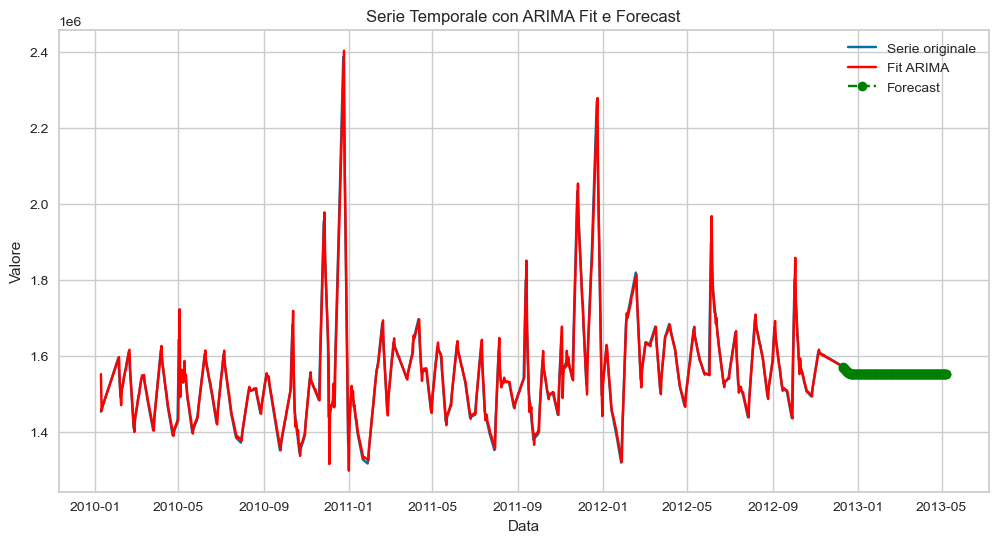

In [286]:
steps = 150
forecast = model_fit.forecast(steps=steps)

# Indici temporali per i forecast
forecast_dates = pd.date_range(start=dateStore_regular.index.max(), periods=steps, freq='1D')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(dateStore_regular, label="Serie originale")
plt.plot(model_fit.fittedvalues, label="Fit ARIMA", color='red')
plt.plot(forecast_dates, forecast, label="Forecast", color='green', linestyle='--', marker='o')

# Legenda e titolo
plt.legend()
plt.title("Serie Temporale con ARIMA Fit e Forecast")
plt.xlabel("Data")
plt.ylabel("Valore")
plt.show()

In [287]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(dateStore_regular[d:], model_fit.fittedvalues)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


RMSE: 19610.319650659465


In [291]:
# loop over pdq to search for the best one (criteria: AIC the lowest)

dValues = [0,1,2]
pValues = [0,1,2,3,4,5,6,7,8,9,10]
qValues = [0,1,2,3]
aicMin = 100000

for d in dValues:
    for p in pValues:
        for q in qValues:
            model = ARIMA(dateStore_regular, order=(p, d, q))
            model_fit = model.fit()
            if model_fit.aic < aicMin:
                aicMin = model_fit.aic
                bD,bP,bQ = d,p,q
print(f'best AIC:{aicMin}, obtained with d:{bD}, p:{bP}, q:{bQ}')

c:\Users\matti\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\matti\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\matti\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\matti\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\matti\anaconda3\Lib\site-packages\stat

best AIC:24100.255707145057, obtained with d:0, p:9, q:0


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1066
Model:                 ARIMA(9, 0, 0)   Log Likelihood              -12039.128
Date:                Thu, 19 Dec 2024   AIC                          24100.256
Time:                        19:22:56   BIC                          24154.944
Sample:                    01-10-2010   HQIC                         24120.977
                         - 12-10-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.552e+06    1.9e+04     81.783      0.000    1.52e+06    1.59e+06
ar.L1          1.6660      0.016    107.210      0.000       1.636       1.696
ar.L2         -0.6530      0.039    -16.900      0.0

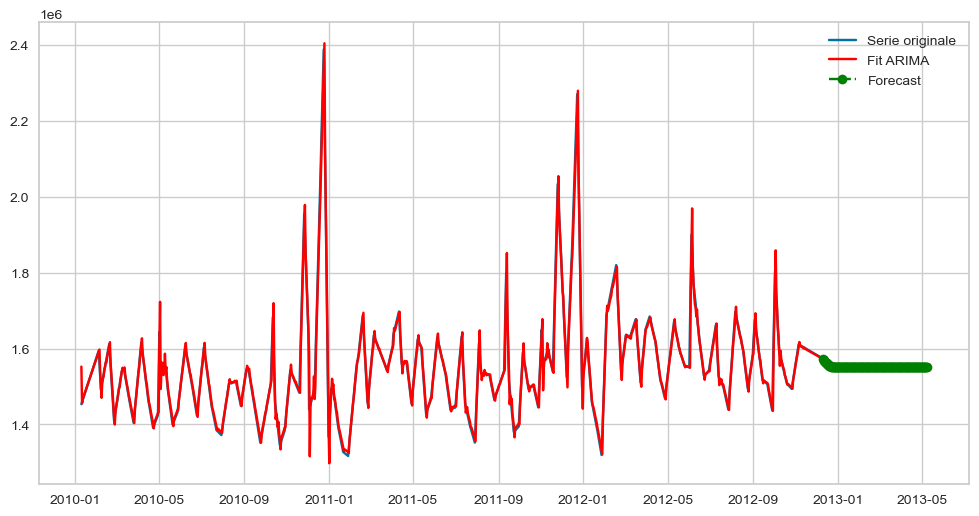

In [294]:
# second try (with d = 1)

p = 9
d = 0
q = 0

model = ARIMA(dateStore_regular[d:], order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())

steps = 150
forecast = model_fit.forecast(steps=steps)  # next 10 points
print("Forecast:", forecast)

forecast_dates = pd.date_range(start=dateStore_regular.index.max(), periods=steps, freq='1D')

plt.figure(figsize=(12, 6))
plt.plot(dateStore_regular[d:], label="Serie originale")
plt.plot(model_fit.fittedvalues, label="Fit ARIMA", color='red')
plt.plot(forecast_dates, forecast, label="Forecast", color='green', linestyle='--', marker='o')
plt.legend()
plt.show()

In [295]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(dateStore_regular[d:], model_fit.fittedvalues)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


RMSE: 19620.603848433773


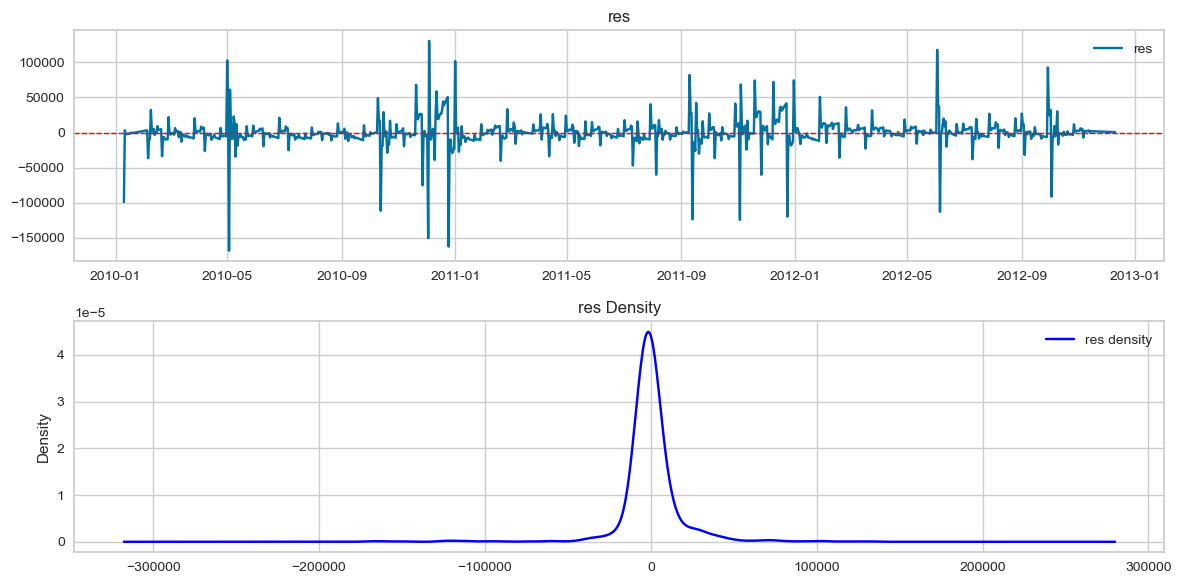

In [296]:
residuals = model_fit.resid

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(residuals, label="res")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("res")
plt.legend()

plt.subplot(2, 1, 2)
residuals.plot(kind='kde', label="res density", color='blue')
plt.title("res Density")
plt.legend()

plt.tight_layout()
plt.show()

# we see no pattern in the first plot --> the model is not wrong (quality assurance)
# a confirmation is in the density plot: a Gaussian function is OK

# SARIMAX

In [ ]:
# maybe the outliers are the problems?
# check for seasonality/trends --> try the SARIMAX
# eventually, LSTM


In [20]:
# starting point

print(dateStore_regular.head())
print(type(dateStore_regular))

2010-01-10    1.453330e+06
2010-01-11    1.458995e+06
2010-01-12    1.464661e+06
2010-01-13    1.470326e+06
2010-01-14    1.475992e+06
Freq: D, dtype: float64
<class 'pandas.core.series.Series'>


In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposeResults = seasonal_decompose(dateStore_regular, model='additive')  # check for 'additive' or 'multiplicative'

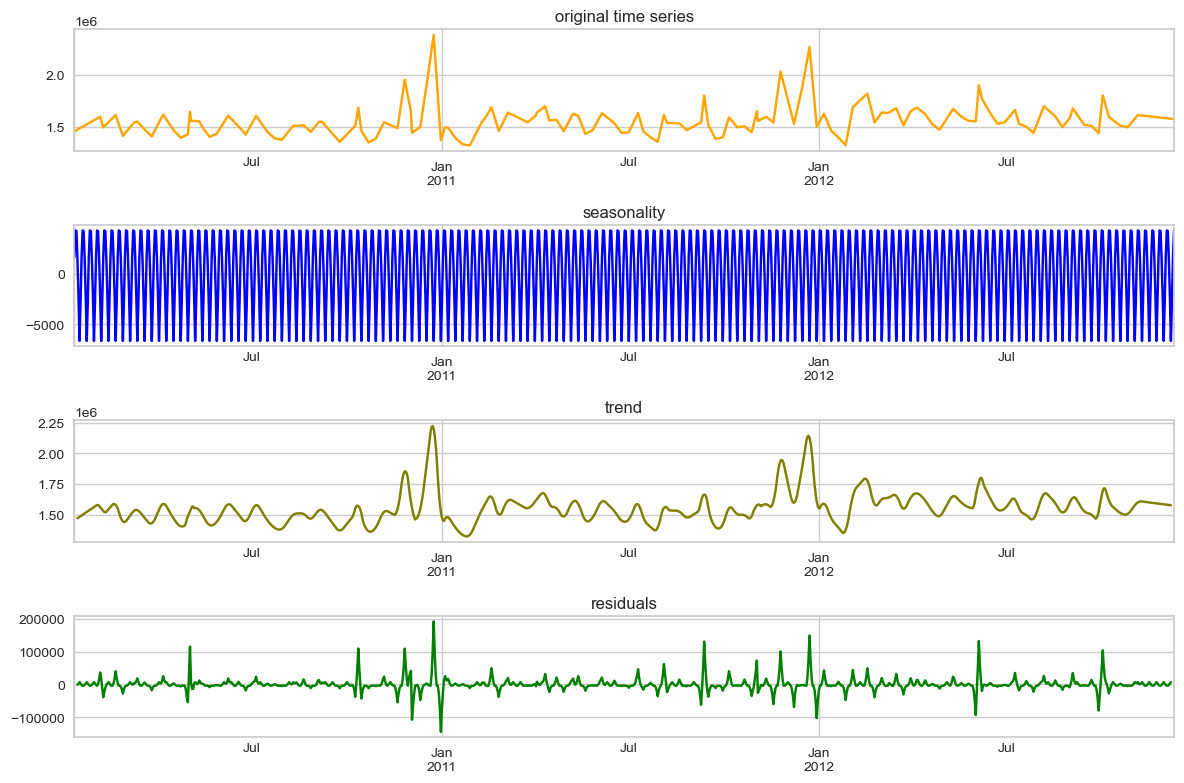

In [31]:
_ , axes = plt.subplots(4,1, figsize=(12,8))

dateStore_regular.plot(ax=axes[0], color='orange')
axes[0].set_title('original time series')

decomposeResults.seasonal.plot(ax=axes[1], color='blue')
axes[1].set_title('seasonality')

decomposeResults.trend.plot(ax=axes[2], color='olive')
axes[2].set_title('trend')

decomposeResults.resid.plot(ax=axes[3], color='green')
axes[3].set_title('residuals')

plt.tight_layout()
plt.show()

<Axes: >

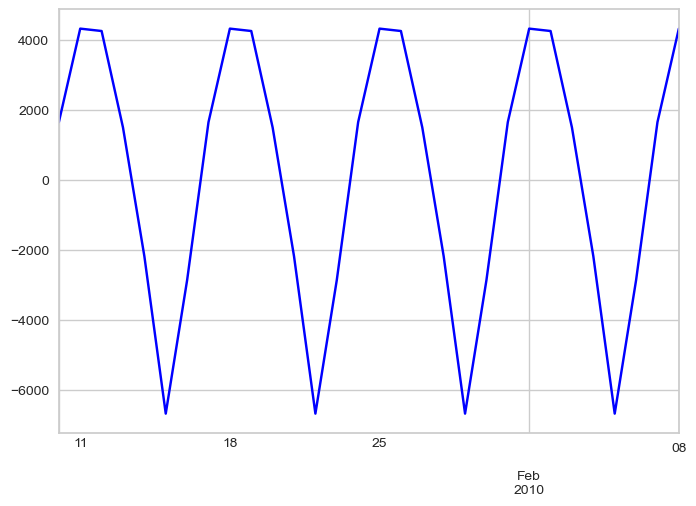

In [ ]:
# focus on seasonality (we have to find out the exact seasonality value)

decomposeResults.seasonal[:30].plot(color='blue')  # plot a single month

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1066
Model:             SARIMAX(4, 1, 1)x(4, 1, 1, 7)   Log Likelihood              -11814.361
Date:                           Fri, 20 Dec 2024   AIC                          23650.723
Time:                                   11:39:08   BIC                          23704.991
Sample:                               01-10-2010   HQIC                         23671.323
                                    - 12-10-2012                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4482      6.357      0.071      0.944     -12.012      12.908
ar.L2          0.2169      4.624      0.047

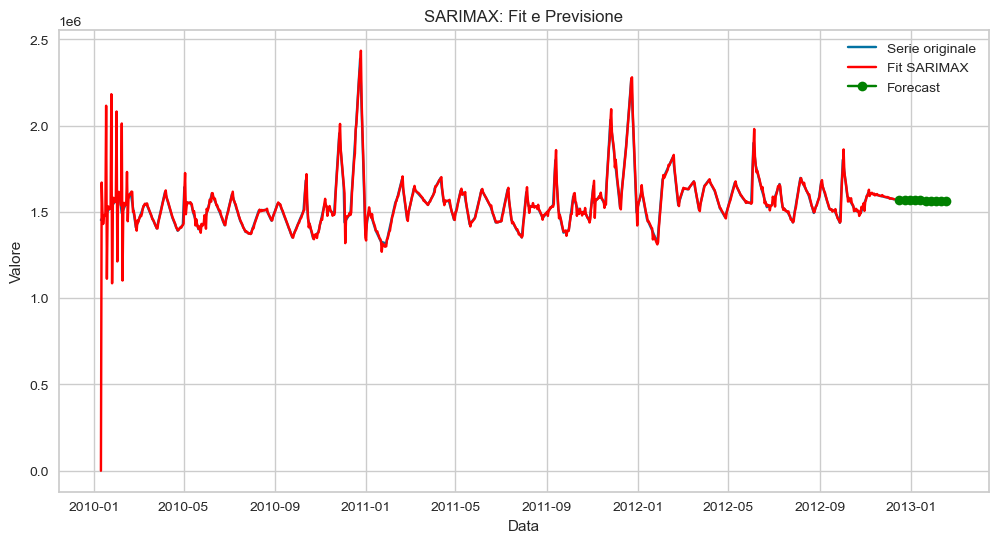

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Definizione del modello SARIMAX
model_sarimax = SARIMAX(
    dateStore_regular, 
    order=(4, 1, 1),  # Parametri non stagionali (p, d, q)
    seasonal_order=(4, 1, 1, 7),  # Parametri stagionali (P, D, Q, s)
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit del modello
sarimax_fit = model_sarimax.fit(disp=False)

# Summary dei risultati
print(sarimax_fit.summary())

# Previsione per i prossimi 10 passi
forecast = sarimax_fit.forecast(steps=10)

# Plot dei risultati
plt.figure(figsize=(12, 6))
plt.plot(dateStore_regular, label="Serie originale")
plt.plot(sarimax_fit.fittedvalues, label="Fit SARIMAX", color='red')
plt.plot(pd.date_range(start=dateStore_regular.index[-1], periods=11, freq='7D')[1:], 
         forecast, marker='o', label="Forecast", color='green')
plt.title("SARIMAX: Fit e Previsione")
plt.xlabel("Data")
plt.ylabel("Valore")
plt.legend()
plt.show()


# LSTM

Epoch 1/20
26/26 [==============================] - 5s 58ms/step - loss: 0.0217 - val_loss: 0.0043
Epoch 2/20
26/26 [==============================] - 1s 24ms/step - loss: 0.0112 - val_loss: 0.0038
Epoch 3/20
26/26 [==============================] - 1s 26ms/step - loss: 0.0095 - val_loss: 0.0043
Epoch 4/20
26/26 [==============================] - 1s 24ms/step - loss: 0.0074 - val_loss: 0.0030
Epoch 5/20
26/26 [==============================] - 1s 39ms/step - loss: 0.0056 - val_loss: 0.0023
Epoch 6/20
26/26 [==============================] - 1s 35ms/step - loss: 0.0038 - val_loss: 0.0022
Epoch 7/20
26/26 [==============================] - 1s 35ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 8/20
26/26 [==============================] - 2s 95ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 9/20
26/26 [==============================] - 2s 83ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 10/20
26/26 [==============================] - 3s 119ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 11

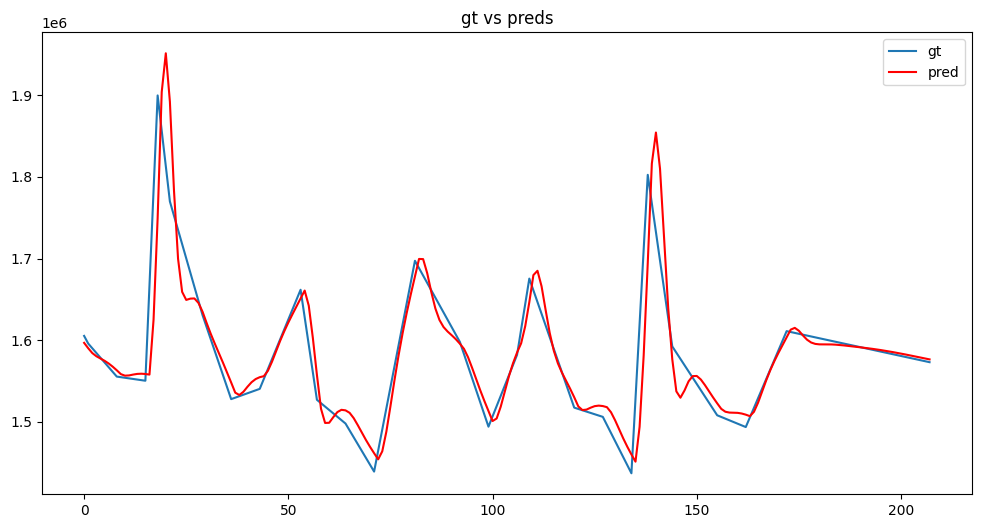

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(dateStore_regular.values.reshape(-1, 1))

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 30
X, y = create_sequences(data_scaled, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)

predictions = model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='gt')
plt.plot(predictions_rescaled, label='pred', color='red')
plt.legend()
plt.title('gt vs preds')
plt.show()